# 1. Introduction
## 1.1. Background
In Japan, one big cultural event is seeing cherry blossoms. Every year, experts in Japan try to predict when the peak bloom (75% of all trees in bloom) at different cities will occur. Historically, this occurred sometime in April, but it appears to occur earlier in recent years, possibly because of global warming.

## 1.2. Objectives
* Detect climate change based on the change in cherry blossom peak day (notation: DOY) at Kyoto/Arashiyama (data 1).
* Predict DOY with varying location/latitudes and years using the historical data collected from Japan (data 2).
* Predict DOY at Japan/Kyoto in 2022 with only year variable (data 2).

# 2. Methods
+ Exploratory Data Analysis (EDA)
+ Data cleaning
+ Non-linear models (cubic spline, local linear regression, polynomial) 
+ Additive model and prediction
+ Time Series ARIMA model and forcasting 

# 3. EDA

In [1]:
setwd('/Users/wushuangyan/Desktop/STAT classes/Finished/STAT 8000')
getwd()

[1] "/Users/wushuangyan/Desktop/STAT classes/Finished/STAT 8000"

In [11]:
library(tidyverse)
library(ggplot2)
library(readxl)
library (ISLR)
library (splines )

## Load data 1

data 1: DOY at Kyoto/Arashiyama in varying years from 801 - 2021.
<br>AD: year.
<br>DOY: day of the year, e.g., 95 indicates the 95th day of the year.
<br>Full-flowering date: fomat in mdd, e.g., 404 means April 4th. 

In [4]:
data1 <- read_excel("FullFlower.xls", col_names = TRUE, na=c("","NA"))
head(data1)
tail(data1)
dim(data1)

AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
801,NA,NA,NA,NA,-
802,NA,NA,NA,NA,-
803,NA,NA,NA,NA,-
804,NA,NA,NA,NA,-
805,NA,NA,NA,NA,-
806,NA,NA,NA,NA,-


AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
2016,95,404,8,0,NEWS-PAPER(ARASHIYAMA)
2017,99,409,8,0,NEWS-PAPER(ARASHIYAMA)
2018,89,330,8,0,NEWS-PAPER(ARASHIYAMA)
2019,95,405,8,0,NEWS-PAPER(ARASHIYAMA)
2020,92,401,8,0,NEWS-PAPER(ARASHIYAMA)
2021,85,326,8,0,NEWS-PAPER(ARASHIYAMA)


[1] 1221    6

## Data Summary

As shown in the data summary below, the year ranges from 801 to 2021, while the DOY ranges from 85 to 124 meaning the cherry blossom peak day occured between the 85th and the 124th day of the years, or between March 26th and May 4th as seen from the Full-flowering date. And the mean and S.D. of DOY are 105 and 6, respectively. 

In [5]:
names(data1)[1:2] <- c("Year", "DOY")
summary(data1)
paste("S.D. of DOY = ", sd(data1$DOY, na.rm = T))

      Year           DOY        Full-flowering date  Source code  
 Min.   : 801   Min.   : 85.0   Min.   :326.0       Min.   :1.00  
 1st Qu.:1106   1st Qu.:100.0   1st Qu.:410.0       1st Qu.:3.00  
 Median :1411   Median :104.0   Median :414.0       Median :3.00  
 Mean   :1411   Mean   :104.5   Mean   :413.5       Mean   :3.46  
 3rd Qu.:1716   3rd Qu.:109.0   3rd Qu.:419.0       3rd Qu.:4.00  
 Max.   :2021   Max.   :124.0   Max.   :504.0       Max.   :8.00  
                NA's   :388     NA's   :388         NA's   :388   
 Data type code  Reference Name    
 Min.   :0.000   Length:1221       
 1st Qu.:1.000   Class :character  
 Median :2.000   Mode  :character  
 Mean   :1.723                     
 3rd Qu.:2.000                     
 Max.   :9.000                     
 NA's   :388                       

[1] "S.D. of DOY =  6.47614618866912"

## Plot the Data

The DOY data is plotted against the Year to see the distribution and any trend.

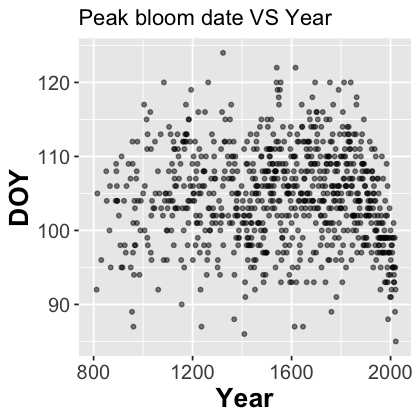

In [521]:
options(warn=-1)
options(repr.plot.width = 3.5, repr.plot.height = 3.5)
ggplot (data1, aes(x=Year, y=DOY)) + 
geom_point (alpha = 0.5, size = 1, colour = "black")+ 
ggtitle ("Peak bloom date VS Year")+ 
theme (axis.text=element_text(size=12), axis.title=element_text(size=16,face="bold")) 

# 4. Data cleaning

In data 1, only "Year" and "DOY" variables are used for data analysis. 31.8% (388 out of 1221 rows) of the data for DOY is missing. It contains complete data (Year and DOY) for continuous years from 1946 to 2021. Since DOY is the response variable, its missing values are not imputed, rows with missing DOY are removed automatically during model fitting.

In [522]:
pMiss <- function(x){sum(is.na(x))/length(x)*100}
miss<-apply(data1,2,pMiss)  
paste ("Missing data percentages: ")
miss
paste ("Years with missing DOY: ")
head(data1$Year[which(is.na(data1$DOY))])
tail(data1$Year[which(is.na(data1$DOY))])

[1] "Missing data percentages: "

Year                 DOY Full-flowering date         Source code 
          0.0000000          31.7772318          31.7772318          31.7772318 
     Data type code      Reference Name 
         31.7772318           0.1638002

[1] "Years with missing DOY: "

[1] 801 802 803 804 805 806

[1] 1730 1872 1895 1919 1921 1945

# 5. Data Analysis

Here, both linear regression model and non-linear models (cubic spline, local linear regression, polynomial)  are fitted for data 1 to detect any trend for climate change.

## 5.1. Linear Regression Model

As seen from the summary and fitted plot below, the Year variable shows a significant effect on the DOY at $\alpha =0.05$ with p-value = 0.03928, however, the linear regression model does not fit the data well when we consider Year as continuous. Since only 0.51% ($R^2=0.0051$) of the data variance is explained by the model. Also we can see the data shows poor linear relationship between Year and DOY.

### Model Summary

In [523]:
g1<-lm(data1$DOY~ data1$Year)
summary(g1)
anova(g1)


Call:
lm(formula = data1$DOY ~ data1$Year)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.7443  -4.6554   0.0242   4.5787  19.1993 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.068e+02  1.160e+00  92.086   <2e-16 ***
data1$Year  -1.514e-03  7.331e-04  -2.065   0.0393 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.463 on 831 degrees of freedom
  (388 observations deleted due to missingness)
Multiple R-squared:  0.005103,	Adjusted R-squared:  0.003906 
F-statistic: 4.262 on 1 and 831 DF,  p-value: 0.03928


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
data1$Year,1,178.0591,178.05906,4.262165,0.03928002
Residuals,831,34716.4115,41.77667,NA,NA


### Actual vs Predicted Plot (with 95% CI)

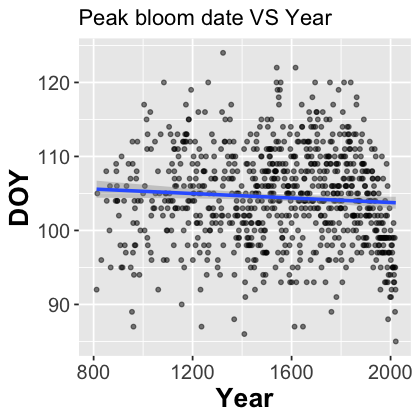

In [524]:
options(repr.plot.width = 3.5, repr.plot.height = 3.5)
ggplot (data1, aes(x=Year, y=DOY)) + 
geom_point (alpha = 0.5, size = 1, colour = "black")+ 
ggtitle ("Peak bloom date VS Year")+ 
theme (axis.text=element_text(size=12), axis.title=element_text(size=16,face="bold"))+
geom_smooth(method = "lm")

## 5.2. Non-linear Models
### 5.2.1. Cubic Spline Model

The cubic spine model below fits the data better than the linear model above with $R^2 = 0.144 > 0.005$, RSE = 6.02, and model p-value $< 2.2e-16$. However, since the data is scattered with large varaince, the $R^2$ is still low.

### Model Summary

In [525]:
doy<-data1$DOY
year<-data1$Year
cubic_fit=lm(doy~bs(year, knots=c(1000,1200,1400,1600,1800)),data=data1)
summary(cubic_fit)


Call:
lm(formula = doy ~ bs(year, knots = c(1000, 1200, 1400, 1600, 
    1800)), data = data1)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.3702  -3.6953  -0.0138   3.9293  19.7471 

Coefficients:
                                                   Estimate Std. Error t value
(Intercept)                                        100.1819     4.5099  22.214
bs(year, knots = c(1000, 1200, 1400, 1600, 1800))1   0.9196     6.6657   0.138
bs(year, knots = c(1000, 1200, 1400, 1600, 1800))2   3.7215     4.3501   0.856
bs(year, knots = c(1000, 1200, 1400, 1600, 1800))3   7.2271     5.0076   1.443
bs(year, knots = c(1000, 1200, 1400, 1600, 1800))4   1.5216     4.5418   0.335
bs(year, knots = c(1000, 1200, 1400, 1600, 1800))5   7.1770     4.7240   1.519
bs(year, knots = c(1000, 1200, 1400, 1600, 1800))6   5.2690     4.6694   1.128
bs(year, knots = c(1000, 1200, 1400, 1600, 1800))7   6.1179     4.7845   1.279
bs(year, knots = c(1000, 1200, 1400, 1600, 1800))8  -7.5406     4.6835  -1

### Actual and Predicted Plot (with 95% CI)

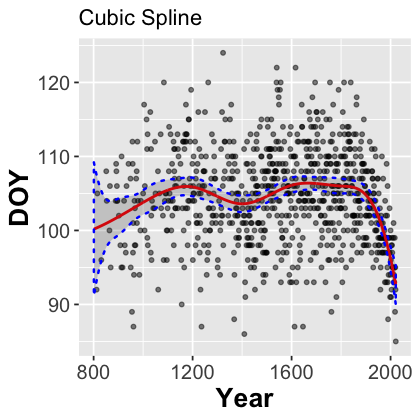

In [526]:
yearlims =range(year)
year.grid=seq (from=yearlims[1], to=yearlims[2],by=1)
cubic_pred=predict(cubic_fit, newdata=list(year=year.grid), se=T)
cubic_bands=cbind(cubic_pred$fit-2*cubic_pred$se.fit, cubic_pred$fit+2*cubic_pred$se.fit)

options(repr.plot.width = 3.5, repr.plot.height = 3.5)
ggplot (data1, aes(x=Year, y=DOY)) + 
geom_point (alpha = 0.5, size = 1, colour = "black")+ 
ggtitle ("Cubic Spline")+ 
theme (axis.text=element_text(size=12), axis.title=element_text(size=16,face="bold"))+
geom_line(aes(x=year.grid, y=cubic_pred$fit), color='red', lwd =0.8)+
geom_ribbon(aes(x = year.grid, ymin = cubic_bands[,1], 
                ymax = cubic_bands[,2]), color= "blue", alpha = .2, lty = 3, lwd =0.7)

### Residual Plots

The residual vs fitted and QQ plots are checked to see if the constant variance and normaility assumptions are met. The residual vs fitted plot shows data plots scattered around 0, but also shows an increasing residual variance with higher fitted values, this is due to the inconstant variance of the original data, especially in the years after 1800. The data in the QQ plot follows an approximately straight line indicating the normaility assumption is met. In addition, the residual vs order plot is also presented. It shows no trends or pattens suggesting the independent residual assumption is met.

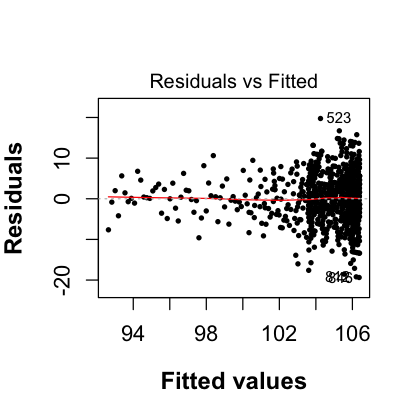

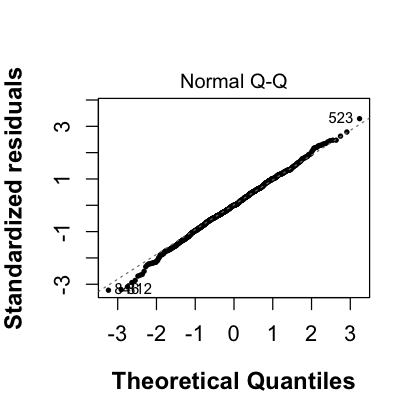

In [527]:
layout(matrix(c(1,1), 1, 2, byrow = F)) 
plot(cubic_fit,1:2, col="black", pch = 16, cex=0.6, cex.axis = 1.1, cex.lab = 1.2,font.lab=2)

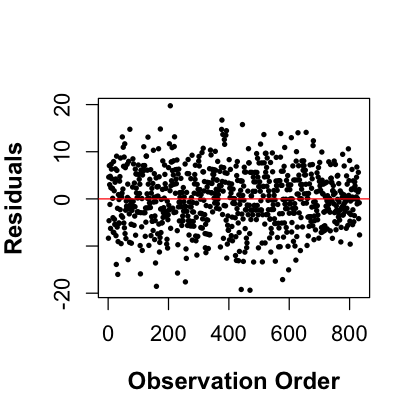

In [528]:
# Residuals vs order plot
plot(cubic_fit$res, col="black", ylab="Residuals",xlab="Observation Order", 
     pch = 16, cex=0.6, cex.axis = 1.1, cex.lab = 1.2,font.lab=2)
abline(h = 0, col="red", lwd=1, lty=1)

### 5.2.2. Local Linear Regression Model
The local linear regression model below fits the data similarly compared to cubic spline, but better than the linear model, with $R^2 = 0.133 > 0.005$ and model RSE = 6.05.
### Model Summary

In [565]:
local_fit=loess(DOY ~ Year, data=data1, span=.6, degree=2)
local_pred=predict(local_fit, newdata=data.frame(Year=year.grid), se=T)
local_bands=cbind(local_pred$fit-2*local_pred$se.fit, local_pred$fit+2*local_pred$se.fit)
local_fit

# Calculate R^2
ss.dist <- sum(scale(data1$DOY, scale=FALSE)^2, na.rm = TRUE)
ss.resid <- sum((resid(local_fit))^2)
paste("R^2 = ", 1-(ss.resid/ss.dist))

Call:
loess(formula = DOY ~ Year, data = data1, span = 0.6, degree = 2)

Number of Observations: 833 
Equivalent Number of Parameters: 5.58 
Residual Standard Error: 6.049 

[1] "R^2 =  0.133401023417231"

### Actual vs Predicted Plot (with 95% CI)

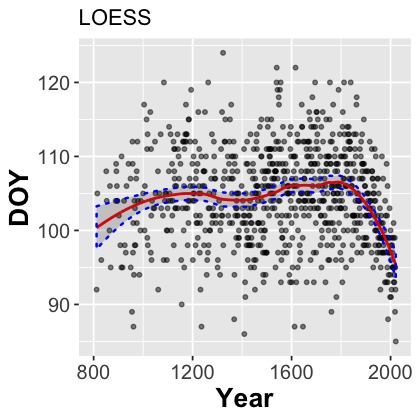

In [566]:
options(repr.plot.width = 3.5, repr.plot.height = 3.5)
ggplot (data1, aes(x=Year, y=DOY)) + 
geom_point (alpha = 0.5, size = 1, colour = "black")+ 
ggtitle ("LOESS")+ 
theme (axis.text=element_text(size=12), axis.title=element_text(size=16,face="bold"))+
geom_line(aes(x=year.grid, y=local_pred$fit), color='red', lwd =0.8)+
geom_ribbon(aes(x = year.grid, ymin = local_bands[,1], 
                ymax = local_bands[,2]), color= "blue", alpha = .2, lty = 3, lwd =0.7);

### Residaul Plots

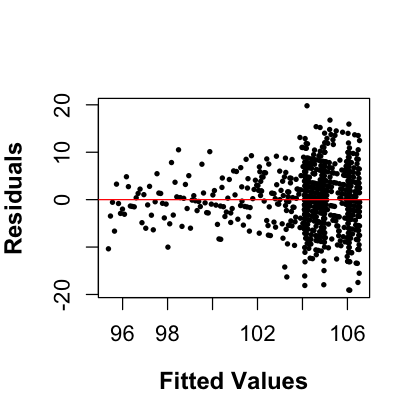

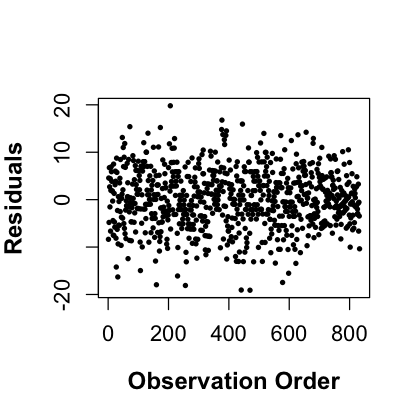

In [615]:
layout(matrix(c(1,1), 1, 2, byrow = F))
plot(local_fit$fit,local_fit$res, col="black", ylab="Residuals",xlab="Fitted Values", 
     pch = 16, cex=0.6, cex.axis = 1.1, cex.lab = 1.2,font.lab=2)
abline(h = 0, col="red", lwd=1, lty=1)

# Residuals vs order plot
plot(local_fit$res, col="black", ylab="Residuals",xlab="Observation Order", 
     pch = 16, cex=0.6, cex.axis = 1.1, cex.lab = 1.2,font.lab=2)
abline(h = 0, col="red", lwd=1, lty=1)

### 5.2.3. Polynomial Model
Close to two previous non-liear models, the polynomial model below fits the data well with  $𝑅^2=0.138 > 0.005$ and model RSE = 6.03.

### Model Summary

In [618]:
poly_fit=lm(data1$DOY~poly(data1$Year, 5), data=data1)
poly_pred=predict (poly_fit, newdata=list(Year=year.grid),se=TRUE)
poly_bands=cbind(poly_pred$fit-2*poly_pred$se.fit, poly_pred$fit+2*poly_pred$se.fit)
summary(poly_fit)


Call:
lm(formula = data1$DOY ~ poly(data1$Year, 5), data = data1)

Residuals:
     Min       1Q   Median       3Q      Max 
-18.8081  -3.7589  -0.1468   4.0518  19.2860 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          104.1884     0.2524 412.740  < 2e-16 ***
poly(data1$Year, 5)1   8.5007    10.6122   0.801   0.4233    
poly(data1$Year, 5)2 -57.4551    10.9457  -5.249 1.94e-07 ***
poly(data1$Year, 5)3 -17.1178    10.8235  -1.582   0.1141    
poly(data1$Year, 5)4 -49.8944    10.2066  -4.888 1.22e-06 ***
poly(data1$Year, 5)5 -17.8310     8.8233  -2.021   0.0436 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.032 on 827 degrees of freedom
  (388 observations deleted due to missingness)
Multiple R-squared:  0.1377,	Adjusted R-squared:  0.1324 
F-statistic:  26.4 on 5 and 827 DF,  p-value: < 2.2e-16


### Actual vs Predicted Plot (with 95% CI)

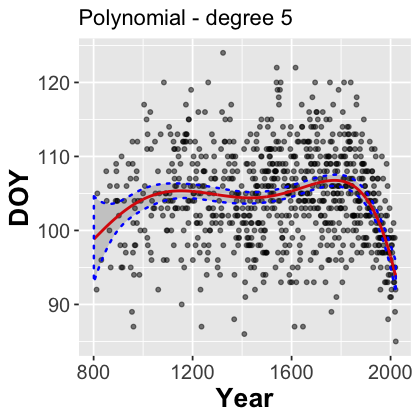

In [619]:
options(repr.plot.width = 3.5, repr.plot.height = 3.5)
ggplot (data1, aes(x=Year, y=DOY)) + 
geom_point (alpha = 0.5, size = 1, colour = "black")+ 
ggtitle ("Polynomial - degree 5")+ 
theme (axis.text=element_text(size=12), axis.title=element_text(size=16,face="bold"))+
geom_line(aes(x=year.grid, y=poly_pred$fit), color='red', lwd =0.8)+
geom_ribbon(aes(x = year.grid, ymin = poly_bands[,1], 
                ymax = poly_bands[,2]), color= "blue", alpha = .2, lty = 3, lwd =0.7);

### Residual Plots

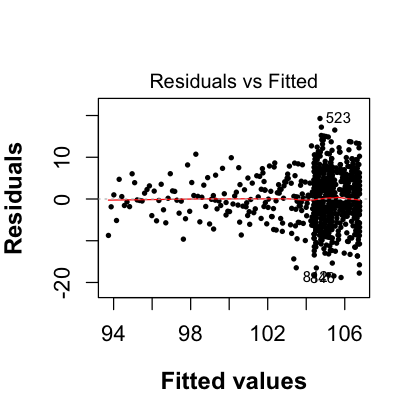

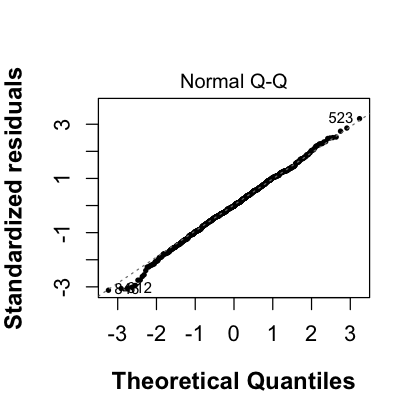

In [548]:
layout(matrix(c(1,1), 1, 2, byrow = F)) 
plot(poly_fit,1:2, col="black", pch = 16, cex=0.6, cex.axis = 1.1, cex.lab = 1.2,font.lab=2)

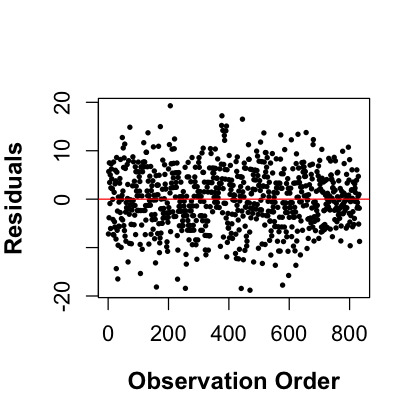

In [620]:
# Residuals vs order plot
plot(poly_fit$res, col="black", ylab="Residuals",xlab="Observation Order", 
     pch = 16, cex=0.6, cex.axis = 1.1, cex.lab = 1.2,font.lab=2)
abline(h = 0, col="red", lwd=1, lty=1)

# Summary

In this project, a linear model and three non-linear models (cubic spline, local linear regression, and polynomial) are used to analyze the trend of DOY by year in data 1. While the cubic spline model leads to the best mode fit or the highest $R^2$, the fitting results for all three non-linear models are similar and better than the results from the linear model. With either non-linear model, the cheery blossom peak day (DOY) are relatively stable before 1800, around 105th day. But after 1800, the DOY begins to drop sharply. This means the peak bloom day kept occuring earlier. Knowing that cherry blossems only bloom at required warm temperatures, this DOY change strongly indicates the existence of global warming. Since higher the temperature becomes, earlier cherry blossoms bloom.